# Simple Analyse the Ronchi Data output from Beam4


- author : Sylvie Dagoret-Campagne
- affiliation : LAL
- date March 10th 2017
- update : May 2020



- Hologram


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib as mpl
import pandas as pd
import itertools

In [2]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (13, 13),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

## Constants for conversions

In [3]:
m_to_mm=1000.
mm_to_m=1e-3
inch_to_mm=25.4
mm_to_inch=1./inch_to_mm
micr_to_m=1e-6
micr_to_mm=1e-3
m_to_micr=1./micr_to_m
m_to_cm=100.
m_to_nm=1e9
nm_to_m=1./m_to_nm

In [4]:
arcdeg_to_arcmin=60.
arcmin_to_arcdeg=1./arcdeg_to_arcmin
arcmin_to_arcsec=60.
arcdeg_to_arcsec=arcdeg_to_arcmin*arcmin_to_arcsec
arcsec_to_arcdeg=1./arcdeg_to_arcsec

In [5]:
deg_to_rad=np.pi/180.

In [6]:
rad_to_deg=1./deg_to_rad
rad_to_arcsec=rad_to_deg*arcdeg_to_arcsec
rad_to_arcmin=rad_to_deg*arcdeg_to_arcmin
arcmin_ro_rad=1./rad_to_arcmin

## Configuration parameters at the telescope

#### telescope

In [7]:
Tel_Focal_Length=12.6 # m : Focal length of the telescope
Tel_Diameter=0.9 # m : Diameter of the telescope    
Tel_Fnum=Tel_Focal_Length/Tel_Diameter

#### filter

In [8]:
Filt_D=0.05769 # m distance of the filter position wrt CCD plane
Filt_size=3*inch_to_mm

#### CCD detector

In [9]:
Det_xpic=24.0 # microns per pixel
Det_NbPix=2048 # number of pixels per CCD side
#Det_NbPix=2512 # number of pixels per CCD side For 400 only
Det_size=Det_xpic*Det_NbPix*micr_to_mm # CCD size in mm, 5 cm or 2 inch

## Input file

In [10]:
# number of rays
NBEAM_X=11
NBEAM_Y=11
NBEAM=NBEAM_X*NBEAM_Y
NWL=4
NBTOT=NBEAM*NWL

In [11]:
theta_x=0.  # angle in arcmin
theta_y=0.  # angle in arcmin 

In [12]:
order="OP1"
order_str="+1"

In [13]:
theta_x_num=int(theta_x*10)
theta_y_num=int(theta_y*10)

In [14]:
Beam4_Rayfile="HOE_Beam4_Rayfile_{:d}_allwl_{:d}_{:d}_{}.xlsx".format(NBTOT,theta_x_num,theta_y_num,order)

In [15]:
figname1="HOE_DISP_Beam4_Rayfile_{:d}_allwl_{:d}_{:d}_{}.pdf".format(NBTOT,theta_x_num,theta_y_num,order)
figname2="HOE_PSF_Beam4_Rayfile_{:d}_allwl_{:d}_{:d}_{}.pdf".format(NBTOT,theta_x_num,theta_y_num,order)

In [16]:
outputdata_excel="HOE_PSF_Beam4_Rayfile_{:d}_allwl_{:d}_{:d}_{}_out.xlsx".format(NBTOT,theta_x_num,theta_y_num,order)

In [17]:
rayfile=Beam4_Rayfile

In [18]:
input = pd.ExcelFile(rayfile)
sheet_name=input.sheet_names[0]
df_colname = input.parse(sheet_name,index_row=0,header=1,usecols=range(0,14))

In [19]:
df_colname

,X0,Y0,Z0,U0,V0,W0,wave,Xgoal,Ygoal,Xfinal,Yfinal,Notes,Unnamed: 12
0,---------------,---------------,---------------,---------------,---------------,---------------,--------,--------,-----------,---------,---------,NaN,NaN
1,-2.91379,-2.91379,0,0.0252377,0.0252377,0.999363,0.0004,0,-4.26,-0.00405,-4.2697,OK,3.0
2,-2.33103,-2.91379,0,0.0201925,0.0252406,0.999477,0.0004,0,-4.26,-0.00324,-4.2697,OK,3.0
3,-1.74827,-2.91379,0,0.0151457,0.0252429,0.999567,0.0004,0,-4.26,-0.00243,-4.2697,OK,3.0
4,-1.16551,-2.91379,0,0.0100978,0.0252445,0.99963,0.0004,0,-4.26,-0.00162,-4.2697,OK,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,0.582757,2.91379,0,-0.00504909,-0.0252454,0.999669,0.001,0,-4.26,-0.00166,-10.8444,OK,3.0
481,1.16551,2.91379,0,-0.0100978,-0.0252445,0.99963,0.001,0,-4.26,-0.00333,-10.8444,OK,3.0
482,1.74827,2.91379,0,-0.0151457,-0.0252429,0.999567,0.001,0,-4.26,-0.00499,-10.8444,OK,3.0
483,2.33103,2.91379,0,-0.0201925,-0.0252406,0.999477,0.001,0,-4.26,-0.00665,-10.8444,OK,3.0


In [20]:
df_colname.head()

,X0,Y0,Z0,U0,V0,W0,wave,Xgoal,Ygoal,Xfinal,Yfinal,Notes,Unnamed: 12
0,---------------,---------------,---------------,---------------,---------------,---------------,--------,--------,-----------,---------,---------,NaN,NaN
1,-2.91379,-2.91379,0,0.0252377,0.0252377,0.999363,0.0004,0,-4.26,-0.00405,-4.2697,OK,3.0
2,-2.33103,-2.91379,0,0.0201925,0.0252406,0.999477,0.0004,0,-4.26,-0.00324,-4.2697,OK,3.0
3,-1.74827,-2.91379,0,0.0151457,0.0252429,0.999567,0.0004,0,-4.26,-0.00243,-4.2697,OK,3.0
4,-1.16551,-2.91379,0,0.0100978,0.0252445,0.99963,0.0004,0,-4.26,-0.00162,-4.2697,OK,3.0


In [21]:
df = input.parse(sheet_name,index_row=0,header=3,usecols=range(0,12))
#df.columns = ["X0","Y0","Z0","U0","V0","W0","wave","col","WFE","Xgoal","Ygoal","Xfinal","Yfinal","Notes"]
df.columns = ["X0","Y0","Z0","U0","V0","W0","wave","Xgoal","Ygoal","Yfinal","Xfinal","Notes"]

In [22]:
df.tail()

,X0,Y0,Z0,U0,V0,W0,wave,Xgoal,Ygoal,Yfinal,Xfinal,Notes
478,0.582757,2.913785,0,-0.005049,-0.025245,0.999669,0.001,0,-4.26,-0.00166,-10.8444,OK
479,1.165514,2.913785,0,-0.010098,-0.025244,0.999630,0.001,0,-4.26,-0.00333,-10.8444,OK
480,1.748271,2.913785,0,-0.015146,-0.025243,0.999567,0.001,0,-4.26,-0.00499,-10.8444,OK
481,2.331028,2.913785,0,-0.020192,-0.025241,0.999477,0.001,0,-4.26,-0.00665,-10.8444,OK
482,2.913785,2.913785,0,-0.025238,-0.025238,0.999363,0.001,0,-4.26,-0.00831,-10.8443,OK


In [23]:
df

,X0,Y0,Z0,U0,V0,W0,wave,Xgoal,Ygoal,Yfinal,Xfinal,Notes
0,-2.331028,-2.913785,0,0.020192,0.025241,0.999477,0.0004,0,-4.26,-0.00324,-4.2697,OK
1,-1.748271,-2.913785,0,0.015146,0.025243,0.999567,0.0004,0,-4.26,-0.00243,-4.2697,OK
2,-1.165514,-2.913785,0,0.010098,0.025244,0.999630,0.0004,0,-4.26,-0.00162,-4.2697,OK
3,-0.582757,-2.913785,0,0.005049,0.025245,0.999669,0.0004,0,-4.26,-0.00081,-4.2697,OK
4,0.000000,-2.913785,0,0.000000,0.025246,0.999681,0.0004,0,-4.26,0.00000,-4.2697,OK
...,...,...,...,...,...,...,...,...,...,...,...,...
478,0.582757,2.913785,0,-0.005049,-0.025245,0.999669,0.0010,0,-4.26,-0.00166,-10.8444,OK
479,1.165514,2.913785,0,-0.010098,-0.025244,0.999630,0.0010,0,-4.26,-0.00333,-10.8444,OK
480,1.748271,2.913785,0,-0.015146,-0.025243,0.999567,0.0010,0,-4.26,-0.00499,-10.8444,OK
481,2.331028,2.913785,0,-0.020192,-0.025241,0.999477,0.0010,0,-4.26,-0.00665,-10.8444,OK


In [24]:
df["Xfinal"]=-df["Xfinal"]

### Decoding

In [25]:
wave=df["wave"]

In [26]:
Xfinal=df["Xfinal"]
Yfinal=df["Yfinal"]

In [27]:
selected_indexes1=np.where(wave==0.0004)
selected_indexes2=np.where(wave==0.0006)
selected_indexes3=np.where(wave==0.0008)
selected_indexes4=np.where(wave==0.0010)

In [28]:
selected_indexes1

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119]),)

In [29]:
selected_indexes2

(array([120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
        133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
        146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158,
        159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171,
        172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184,
        185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197,
        198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210,
        211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223,
        224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236,
        237, 238, 239, 240]),)

In [30]:
selected_indexes3

(array([241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253,
        254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266,
        267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279,
        280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292,
        293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305,
        306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318,
        319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331,
        332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344,
        345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357,
        358, 359, 360, 361]),)

In [31]:
selected_indexes4

(array([362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374,
        375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387,
        388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400,
        401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413,
        414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426,
        427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439,
        440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452,
        453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465,
        466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478,
        479, 480, 481, 482]),)

In [32]:
def GetInfo(a):
    a_av=np.average(a)
    a_rms=np.std(a)
    a_min=np.min(a)
    a_max=np.max(a)
    a_width=a_max-a_min
    return a_av,a_rms,a_min,a_max,a_width

In [33]:
x1=Xfinal[selected_indexes1[0]]
y1=Yfinal[selected_indexes1[0]]

In [34]:
x1av,x1std,x1min,x1max,x1wdt=GetInfo(x1)
y1av,y1std,y1min,y1max,y1wdt=GetInfo(y1)

In [35]:
x2=Xfinal[selected_indexes2[0]]
y2=Yfinal[selected_indexes2[0]]

In [36]:
x2av,x2std,x2min,x2max,x2wdt=GetInfo(x2)
y2av,y2std,y2min,y2max,y2wdt=GetInfo(y2)

In [37]:
x3=Xfinal[selected_indexes3[0]]
y3=Yfinal[selected_indexes3[0]]

In [38]:
x3av,x3std,x3min,x3max,x3wdt=GetInfo(x3)
y3av,y3std,y3min,y3max,y3wdt=GetInfo(y3)

In [39]:
x4=Xfinal[selected_indexes4[0]]
y4=Yfinal[selected_indexes4[0]]

In [40]:
x4av,x4std,x4min,x4max,x4wdt=GetInfo(x4)
y4av,y4std,y4min,y4max,y4wdt=GetInfo(y4)

In [41]:
xav=np.array([x1av,x2av,x3av,x4av])
xstd=np.array([x1std,x2std,x3std,x4std])
xmin=np.array([x1min,x2min,x3min,x4min])
xmax=np.array([x1max,x2max,x3max,x4max])
xwdt=np.array([x1wdt,x2wdt,x3wdt,x4wdt])
yav=np.array([y1av,y2av,y3av,y4av])
ystd=np.array([y1std,y2std,y3std,y4std])
ymin=np.array([y1min,y2min,y3min,y4min])
ymax=np.array([y1max,y2max,y3max,y4max])
ywdt=np.array([y1wdt,y2wdt,y3wdt,y4wdt])

In [42]:
dataout = {'xav': xav,'xstd' :xstd,'xmin' :xmin,'xmax' :xmax,'xwdt':xwdt,'yav': yav,'ystd' :ystd,'ymin' :ymin,'ymax' :ymax,'ywdt':ywdt}

In [43]:
df = pd.DataFrame(dataout, index = ['400nm', '600nm', '800nm', '1000nm'])

In [44]:
df.head()

,xav,xstd,xmin,xmax,xwdt,yav,ystd,ymin,ymax,ywdt
400nm,4.261560,0.005097,4.2535,4.2697,0.0162,3.375000e-05,0.002555,-0.00409,0.00409,0.00818
600nm,6.415099,0.001347,6.4129,6.4172,0.0043,0.000000e+00,0.001296,-0.00208,0.00208,0.00416
800nm,8.596301,0.006422,8.5861,8.6064,0.0203,3.584139e-21,0.001301,-0.00209,0.00209,0.00418
1000nm,10.815425,0.018368,10.7863,10.8444,0.0581,-4.300967e-20,0.005270,-0.00834,0.00834,0.01668


In [45]:
df.to_excel(outputdata_excel)

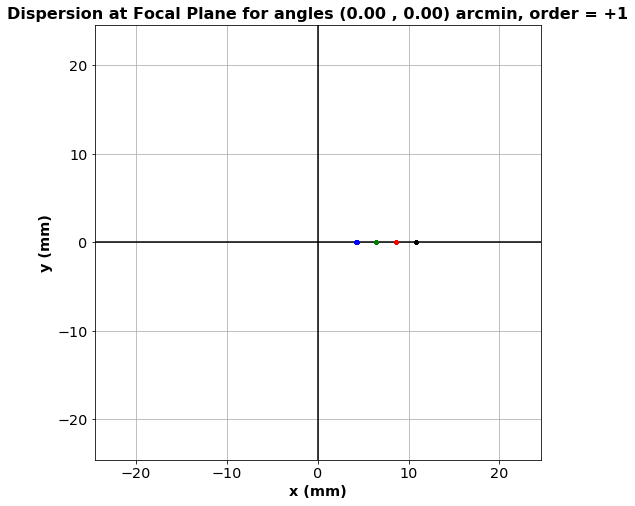

In [46]:
plt.figure(figsize=(8,8))
plt.axhline(y=0,color="k")
plt.axvline(x=0,color="k")
plt.plot(x1,y1,"b.")
plt.plot(x2,y2,"g.")
plt.plot(x3,y3,"r.")
plt.plot(x4,y4,"k.")

plt.xlim(-Det_size/2,Det_size/2.)
plt.ylim(-Det_size/2,Det_size/2)
plt.grid(True)
plt.xlabel("x (mm)",fontweight='bold')
plt.ylabel("y (mm)",fontweight='bold')
fulltitle="Dispersion at Focal Plane for angles ({:2.2f} , {:2.2f}) arcmin, order = {}".format(theta_x,theta_y,order_str)
plt.title(fulltitle,fontsize=16,fontweight='bold')
plt.savefig(figname1)

In [47]:
def Showscale(x,y,w,label,ax):
    xmin=x-w/2
    xmax=x+w/2
    ymin=y-w/2
    ymax=y+w/2
    xscale=xmax-xmin
    yscale=ymax-ymin
    ax.axhline(y=y,color="k")
    ax.axvline(x=x,color="k")
    ax.plot([xmin+xscale*.1,xmin+xscale*.1+wdt/10.],[ymin+yscale*0.8,ymin+yscale*0.8],'k-',lw=2)
    ax.text(xmin+xscale*.1, ymin+yscale*0.85, label,fontsize=16, fontweight='bold')

In [48]:
def Showstat(x,y,w,xstd,ystd,ax):
    
    xmin=x-w/2
    xmax=x+w/2
    ymin=y-w/2
    ymax=y+w/2
    xscale=xmax-xmin
    yscale=ymax-ymin
    stat_str_x="$\\sigma_x=${:2.2f} $\\mu$ m".format(xstd*1000)
    stat_str_y="$\\sigma_y=${:2.2f} $\\mu$ m".format(ystd*1000)
    print(stat_str_x)
    ax.text(xmax-xscale*.4, ymin+yscale*0.85, stat_str_x,fontsize=16, fontweight='bold')
    ax.text(xmax-xscale*.4, ymin+yscale*0.80, stat_str_y,fontsize=16, fontweight='bold')

$\sigma_x=$5.10 $\mu$ m
$\sigma_x=$1.35 $\mu$ m
$\sigma_x=$6.42 $\mu$ m
$\sigma_x=$18.37 $\mu$ m


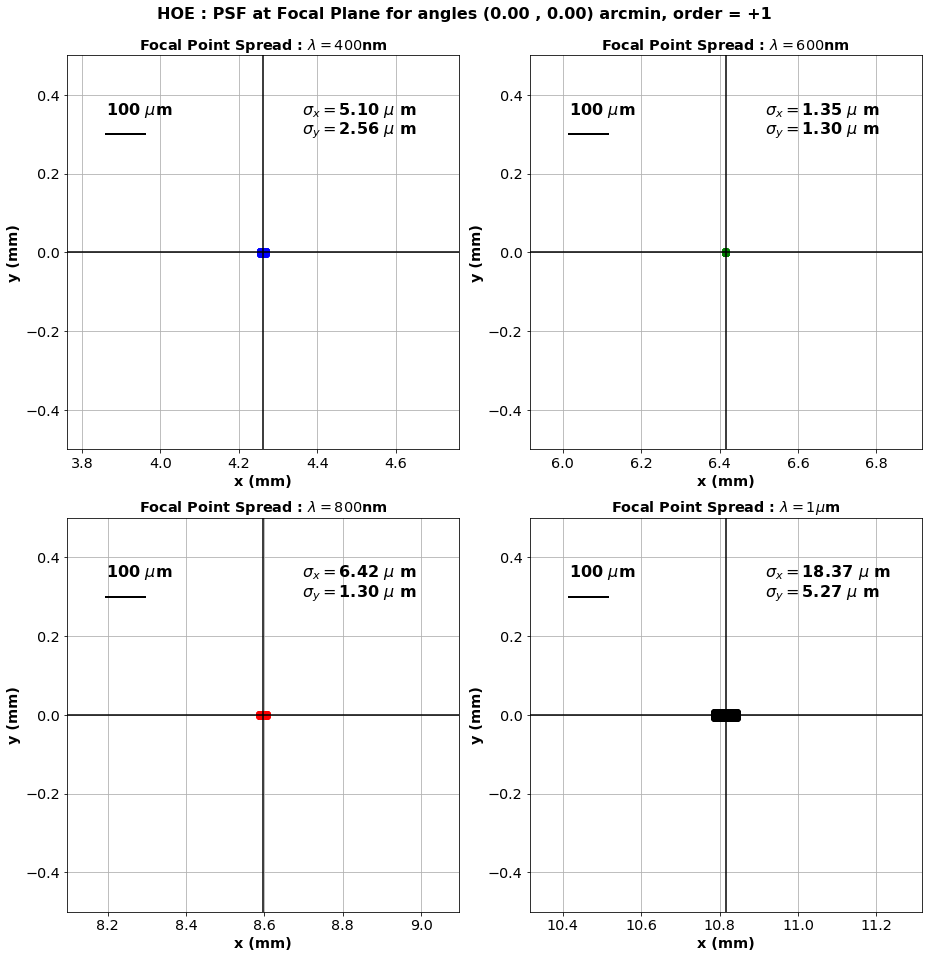

In [49]:
wdt=1.00  # with 100 microns
scalelabel="100 $\mu$m"
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.plot(x1, y1,'bo')

xmin=x1av-wdt/2
xmax=x1av+wdt/2
ymin=y1av-wdt/2
ymax=y1av+wdt/2
xscale=xmax-xmin
yscale=ymax-ymin

#ax1.plot([xmin+xscale*.1,xmin+xscale*.1+wdt/10.],[ymin+yscale*0.8,ymin+yscale*0.8],'k-',lw=2)
#ax1.text(xmin+xscale*.1, ymin+yscale*0.85, scalelabel,fontsize=16, fontweight='bold')

Showscale(x1av,y1av,wdt,scalelabel,ax1)
Showstat(x1av,y1av,wdt,x1std,y1std,ax1)

ax1.set_xlim(x1av-wdt/2,x1av+wdt/2)
ax1.set_ylim(y1av-wdt/2,y1av+wdt/2)
ax1.set_title('Focal Point Spread : $\lambda=400$nm',fontweight='bold')
ax1.set_xlabel('x (mm)',fontweight='bold')
ax1.set_ylabel('y (mm)',fontweight='bold')
ax1.grid()
#----
ax2.plot(x2, y2,'go')
Showscale(x2av,y2av,wdt,scalelabel,ax2)
Showstat(x2av,y2av,wdt,x2std,y2std,ax2)
ax2.set_xlim(x2av-wdt/2,x2av+wdt/2)
ax2.set_ylim(y2av-wdt/2,y2av+wdt/2)
ax2.set_xlabel('x (mm)',fontweight='bold')
ax2.set_ylabel('y (mm)',fontweight='bold')
ax2.grid()
ax2.set_title('Focal Point Spread : $\lambda=600$nm',fontweight='bold')
#--------
ax3.plot(x3, y3,'ro')
Showscale(x3av,y3av,wdt,scalelabel,ax3)
Showstat(x3av,y3av,wdt,x3std,y3std,ax3)
ax3.set_xlim(x3av-wdt/2,x3av+wdt/2)
ax3.set_ylim(y3av-wdt/2,y3av+wdt/2)
ax3.set_xlabel('x (mm)',fontweight='bold')
ax3.set_ylabel('y (mm)',fontweight='bold')
ax3.grid()
ax3.set_title('Focal Point Spread : $\lambda=800$nm',fontweight='bold')
#-----
ax4.plot(x4, y4,'ko')
Showscale(x4av,y4av,wdt,scalelabel,ax4)
Showstat(x4av,y4av,wdt,x4std,y4std,ax4)
ax4.set_xlim(x4av-wdt/2,x4av+wdt/2)
ax4.set_ylim(y4av-wdt/2,y4av+wdt/2)
ax4.set_xlabel('x (mm)',fontweight='bold')
ax4.set_ylabel('y (mm)',fontweight='bold')
ax4.grid()
ax4.set_title('Focal Point Spread : $\lambda=1\mu$m',fontweight='bold')
fulltitle="PSF at Focal Plane for file = {}".format(rayfile)
fulltitle="HOE : PSF at Focal Plane for angles ({:2.2f} , {:2.2f}) arcmin, order = {}".format(theta_x,theta_y,order_str)
plt.suptitle(fulltitle,fontsize=16,fontweight='bold',y=1.02)
plt.tight_layout()
plt.savefig(figname2)